In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10))


In [5]:
# Taken from boiler for Assignment 1
def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
print(train_data.shape, train_labels.shape)

(6000, 784) (6000,)


In [14]:
def gradient_descent(x,n=0.00001,iterations = 1000):
    errors = []
    temp = np.random.random((784,2))
    u,d,v_t = np.linalg.svd(temp)
    v = u[:,:2]
    
    for i in range(iterations):
        T_0 = (np.dot(np.dot(x, v), v.T) - x)
        T_2 = (np.dot(np.dot(v, v.T), x.T) + -x.T)
        t_1 = np.linalg.norm(T_0, 'fro')
        gradient = (((1 / np.linalg.norm(T_2, 'fro')) * np.dot(np.dot(x.T, T_0), v)) + ((1 / t_1) * np.dot(np.dot(T_2, x), v)))
        errors.append(np.linalg.norm(T_0))
        v = v - n * gradient
#         print(v)
    plt.plot(errors)
    plt.savefig('2_errors.png')
    return v

In [15]:
# Zero centering
train_data = train_data - np.mean(train_data, axis = 0)
v_grad = grad_desc(train_data)

KeyboardInterrupt: 

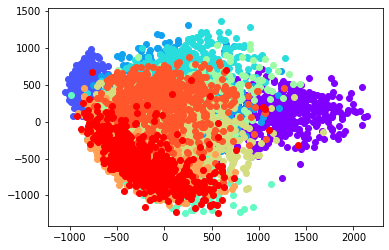

In [21]:
cov = np.cov(train_data.T)
values, vectors = np.linalg.eig(cov)
# indices = np.argsort(values)[::-1]
# values = values[indices]
# vectors = vectors[:,indices]
v_cfs = vectors[:,:2]

data_cfs = np.dot(train_data,v_cfs)
# data_grad = np.dot(train_data,v_grad)


# In[27]:


for i in range(10):
    plt.scatter(data_cfs[:,0][train_labels == i],data_cfs[:,1][train_labels == i],color=colors[i])
# plt.savefig('2_eig.png')


# In[28]:


# for i in range(10):
#     plt.scatter(data_grad[:,0][train_labels == i],data_grad[:,1][train_labels == i],color=colors[i])
# plt.savefig('2_grad.png')

plt.show()